# Стохастический градиентный спуск
Данный метод является модификацией градиентного спуска, использующейся для оптимизации функций, представимых в виде суммы. Применяя классический градиентный спуск к таким функциям вычисление градиента требует вычисление градиента каждой функции из суммы, что может быть вычислительно затратно. В стохастическом градиентном спуске вместо полного градиента вычисляется градиент лишь одной случайной функции из суммы. Это позволяет сделать намного больше итераций алгоритма за то же время, при этом каждая итерация уменьшает значение функции для *достаточно хороших функций*.

В качестве примера работы стохастического градиентного спуска рассмотрим его эффективность для решения задачи линейной регрессии. Оптимизируемая функция - сумма квадратов ошибок. Для наглядности будем аппроксимировать функции от 1 переменной.
$ f_i(a, b) = (a x_i + b - y_i)^2 $

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Best value found: x* = [ 4.62944663 -0.07790136] with f(x*) = 307.83391120513915


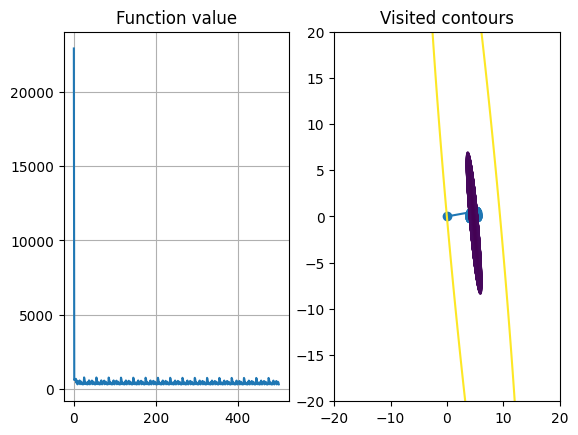

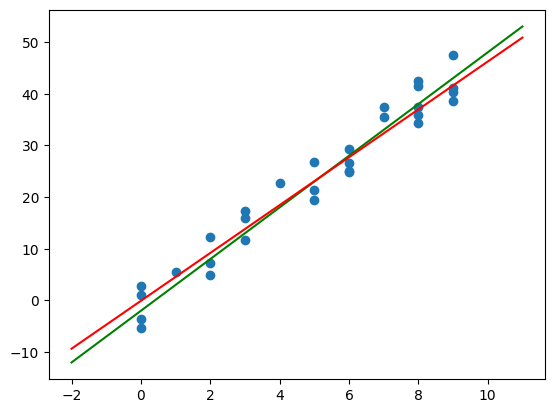

In [118]:
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *
import random

roi = SearchRegion2d((-20, 20), (-20, 20))


def get_error_func(x, y):
    return lambda args: (args[0] * x + args[1] - y) ** 2


def get_error_func_derivative(x, y):
    def func(args):
        a, b = args[0], args[1]
        common = 2 * (a * x + b - y)
        return np.array([common * x, common])

    return func


def generate_dataset(a, b, xs, noise_range=1):
    return [[x, a * x + b + noise_range * (2 * random.random() - 1)] for x in xs]


a = 5
b = -2
dataset = generate_dataset(a, b, [random.choice(range(10)) for i in range(30)], 5)


def solve_regression(dataset, batch_size=1, step_length=0.007):
    points = gradient_descent_minibatch([get_error_func(point[0], point[1]) for point in dataset],
                                        [get_error_func_derivative(point[0], point[1]) for point in dataset],
                                        batch_size,
                                        np.array([0, 0]), fixed_step_search(step_length),
                                        lambda f, steps: len(steps) > 500)

    visualize_optimizing_process(lambda x: sum(get_error_func(point[0], point[1])(x) for point in dataset), roi,
                                 np.array(points))
    return points[-1]


res_a, res_b = solve_regression(dataset)
visualize_linear_regression_solution(a, b, res_a, res_b, dataset)


Best value found: x* = [-2.0501145   4.09608726] with f(x*) = 13582.872810333956


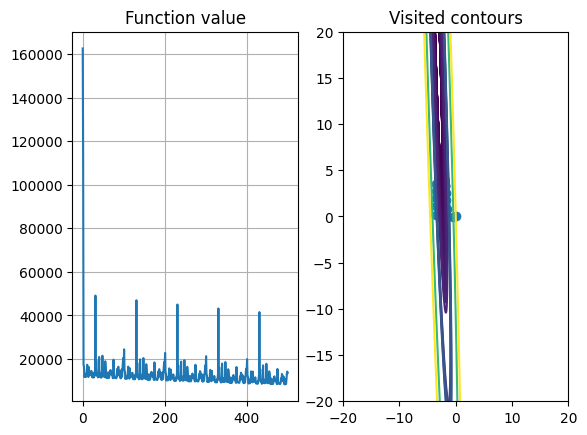

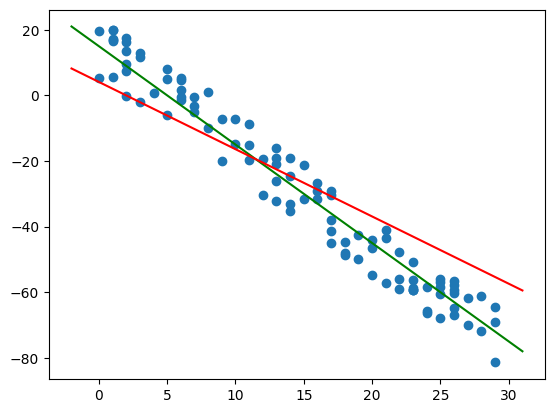

In [123]:
a = -3
b = 15
dataset = generate_dataset(a, b, [random.choice(range(30)) for _ in range(100)], 10)
res_a, res_b = solve_regression(dataset, step_length=0.001)
visualize_linear_regression_solution(a, b, res_a, res_b, dataset)

Best value found: x* = [ 5.22963246 -9.62284515] with f(x*) = 88162.61306769992


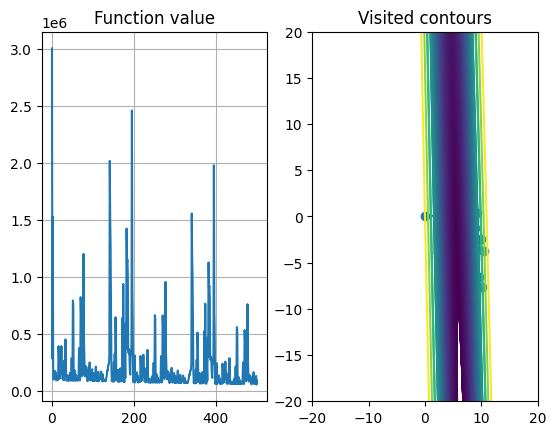

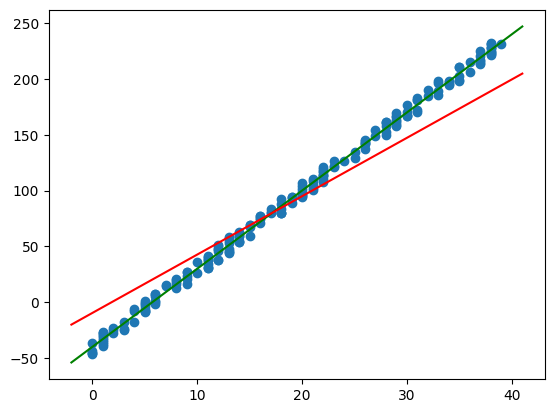

In [126]:
a = 7
b = -40
dataset = generate_dataset(a, b, [random.choice(range(40)) for _ in range(200)], 7)
res_a, res_b = solve_regression(dataset, step_length=0.001)
visualize_linear_regression_solution(a, b, res_a, res_b, dataset)

Best value found: x* = [ 6.03096957 -9.28313325] with f(x*) = 59665.533121852764


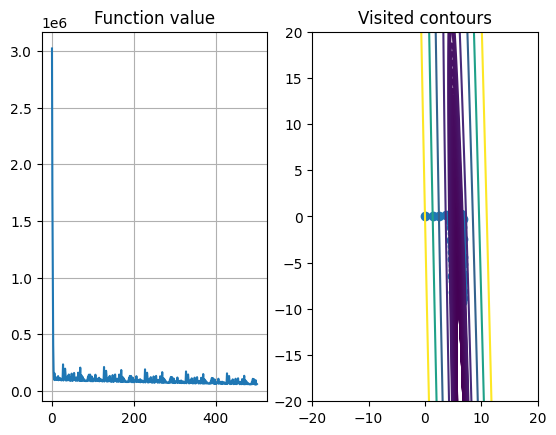

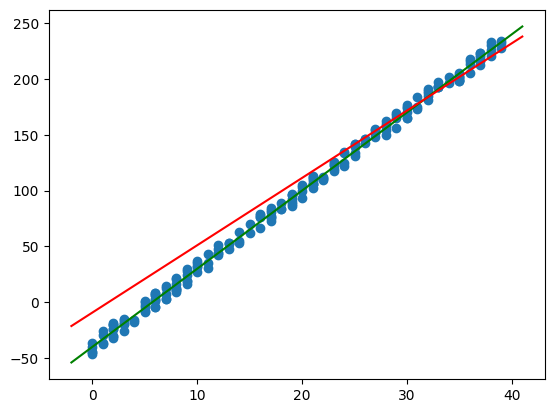

In [131]:
dataset = generate_dataset(a, b, [random.choice(range(40)) for _ in range(200)], 7)
res_a, res_b = solve_regression(dataset, batch_size=2, step_length=0.0005)
visualize_linear_regression_solution(a, b, res_a, res_b, dataset)

Best value found: x* = [-2.50954184  7.21595897] with f(x*) = 5678.8368438904945


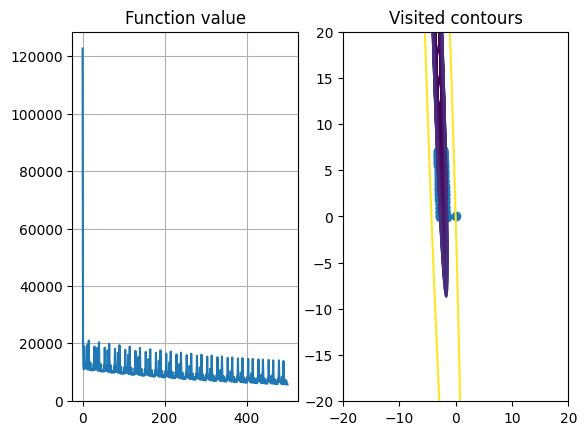

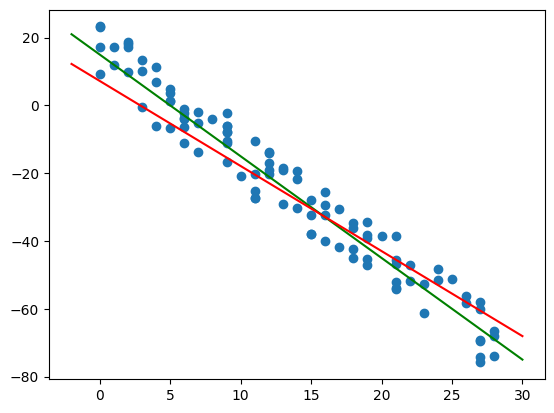

In [151]:
a = -3
b = 15
dataset = generate_dataset(a, b, [random.choice(range(30)) for _ in range(100)], 10)
res_a, res_b = solve_regression(dataset, step_length=0.0005, batch_size=4)
visualize_linear_regression_solution(a, b, res_a, res_b, dataset)